<p><strong><span style="font-size: 22px;">Tutorial 6 - k-nearest neighbors (KNN) Algorithm Classification</span></strong></p>
<p>At this tutorial we discuss about k-nearest neighbors (KNN) algorithm.</p>
<p>There are 3 session:</p>
<ol>
    <li>&nbsp; &nbsp;Explain how KNN algorithm work</li>
    <li>&nbsp; &nbsp;2D KNN fMRI data classification&nbsp;</li>
    <li>&nbsp; &nbsp;High Dimension KNN &nbsp;fMRI data Classification &nbsp;</li>
</ol>
<p><span style="font-size: 18px;">KNN algorithm</span></p>
<p>In k-NN classifcation, the output is a class membership. An object is classied by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small).&nbsp;</p>
<p>If k = 1, then the object is simply assigned to the class of that single nearest neighbor.</p>
<p><span style="font-size: 18px;">How KNN algorithm work? </span></p>
<ol>
    <li>Calculate distances - Start by calculate the distances between the gray point and all other points</li>
    <li>Find neighbours - find the nearest neighbours by ranking points by increasing distances. the nearest neighbours (NN) of the gray point are the ones closest in dataspace.</li>
    <li>Vote for labels - Vote on the predicted class labels based on the classes of the k nearest nieghbours. Here the labels were predicted based on the k=3 nearest neighbours. </li>
</ol>

 <img src= "images\knn\knn.jpg" />

2D KNN fMRI Classification 

 <img src= "images\knn\haxby.jpg" />
 <img src= "images\knn\voxel_activite.jpg" />

Preprocessing

In [ ]:
X.shape

(1452, 577)

In [ ]:
house_all = X[y == 'house']
face_all = X[y == 'face']
#categories = y.unique()
label = np.concatenate((np.zeros(12),np.ones(12)), axis = 0)
label_str = np.concatenate([['face']*12 , ['house']*12], axis = 0)


In [ ]:
face=face_all[50:62,:]
house=house_all[50:62,:]

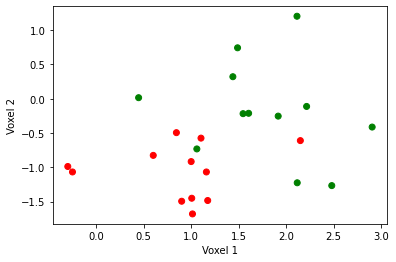

In [ ]:
vox_num_1 = 250
vox_num_2 = 300
voxel_1 = np.concatenate((face[:,vox_num_1], house[:,vox_num_1]), axis = 0)
voxel_2 = np.concatenate((face[:,vox_num_2], house[:,vox_num_2]), axis = 0)
color = np.concatenate([['r']*12 , ['g']*12], axis = 0)
plt.scatter(voxel_1, voxel_2, c=color , cmap= 'Set1')
plt.xlabel("Voxel 1")
plt.ylabel("Voxel 2")
# Display the plot
plt.show()

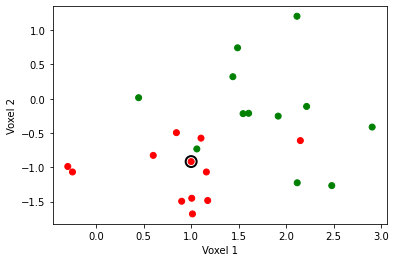

In [ ]:
observartion = 1
test = data[observartion,:]
color = np.concatenate([['r']*12 , ['g']*12], axis = 0)
plt.scatter(voxel_1, voxel_2, c=color)#, cmap= 'Set1')
plt.scatter(test[0], test[1], s=120,linewidths =2, facecolors='none', edgecolors='k')
plt.xlabel("Voxel 1")
plt.ylabel("Voxel 2")
# Display the plot
plt.show()


split data to train and test

we want to split data to train and test. 

lets choose one point from the data for test variable

In [ ]:
data = np.stack([voxel_1 ,voxel_2 ], axis=1)
test_label = label[observartion]

In [ ]:
# 1. Calculate distances
train = np.delete(data,observartion, 0)
train.shape

(23, 2)

In [ ]:
testMatrix = np.tile(test,(23,1))
absDiff = np.abs(train - testMatrix)
square = np.square(absDiff)
distance =np.sum(square,1)
distance = np.round(distance,2)


In [ ]:

k = 5

idx = np.argpartition(distance, k)
neighborsInd = label_str[idx[:k]] 

[print( f'Neighbour number {i+1} : {label_}' ) for i, label_ in enumerate(label_str[idx[:k]])]


Neighbour number 1 : face
Neighbour number 2 : face
Neighbour number 3 : house
Neighbour number 4 : face
Neighbour number 5 : face


[None, None, None, None, None]

In [ ]:
#print(distance)
face_count = np.count_nonzero(neighborsInd == 'face')
house_count = np.count_nonzero(neighborsInd == 'house')

if face_count> house_count:
    print("Predict Label: Face")
else:
    print("Predict Label: House")

Predict Label: Face


#2. Find neighbours 


Create a Model

Preprocces

In [ ]:
# mask the data
from nilearn.input_data import NiftiMasker
mask_filename = haxby_dataset.mask_vt[0]
masker = NiftiMasker(mask_img=mask_filename, standardize=True, detrend=True)
X = masker.fit_transform(func_file)

# cognitive annotations
import pandas as pd
behavioral = pd.read_csv(haxby_dataset.session_target[0], delimiter=' ')
y = behavioral['labels']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors =3 , weights =  'distance' , algorithm = 'brute')

knn_model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import classification_report
y_train_pred = knn_model.predict(X_train)
print(classification_report(y_train, y_train_pred))

In [ ]:
y_test_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

In [ ]:
import sys
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
sys.path.append('../src')
cm_svm = confusion_matrix(y_test, y_test_pred)
model_conf_matrix = cm_svm.astype('float') / cm_svm.sum(axis = 1)[:, np.newaxis]



In [ ]:
df_cm = pd.DataFrame(model_conf_matrix, index =categories,
                  columns = categories)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)